<a href="https://colab.research.google.com/github/SaharaSheik/Machine-Leaning-Exploratory-Data-Analysis-/blob/main/Sheikholeslami_Sahar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This jupyter notebook is prepared by “Sahar Sheikholeslami”.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1) import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)import numpy as np

In [ ]:
#import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import tree, ensemble, linear_model
import missingno as msno

In [ ]:
#2- import the data to a dataframe and show how many rows and columns does it have (1 pt)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hrdata.csv')
data.shape

(21287, 18)

In [ ]:
#3 - call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)

In [ ]:
data.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


In [ ]:
data.describe(include = "all")

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287,21287.000000,16271,21287,20870,20775,18162,21217,14727,14513,20824,21287.000000,19158.000000,21287,21287.000000
unique,NaN,NaN,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN,1,NaN
top,NaN,NaN,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN,CA,NaN
freq,NaN,NaN,NaN,4828,NaN,14681,15316,15336,12867,16113,3669,3421,10958,8924,NaN,NaN,21287,NaN
mean,10643.000000,10644.000000,16873.983652,NaN,0.828462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.328510,0.249348,NaN,8.284615
std,6145.171926,6145.171926,9612.131237,NaN,0.123537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.075201,0.432647,NaN,1.235365
min,0.000000,1.000000,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,4.480000
25%,5321.500000,5322.500000,8554.500000,NaN,0.739000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000,NaN,7.390000
50%,10643.000000,10644.000000,16967.000000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000,NaN,9.030000
75%,15964.500000,15965.500000,25161.500000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000,NaN,9.200000


In [ ]:
#Explain in words if you find any column’s statistics interesting and good to know (1 pt)

In [ ]:
#city_development_index & city_development_matrics are basically same data by a multiplyer of 10  So one column can be eliminated
#rec_num & Unnamed seem to be the same data, so one can be eliminated
# the target which is an indicator of individual looking to change jobs or not has a mean of 0.249.  Given that this number is
#either 0 or 1 I think it shows most of the targets are concentrated at 0 (not looking for a job)

In [ ]:
#Show the top 5 rows and last 5 rows of the data frame (1 pt)

In [ ]:
data.head()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


In [ ]:
data.tail()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21282,21282,21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21283,21283,21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21284,21284,21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21285,21285,21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21286,21286,21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


In [ ]:
#4- List all the numerical columns (1 pt)

In [ ]:
numerical_columns=data.select_dtypes(include=[np.number])

In [ ]:
numerical_columns.columns

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')

In [ ]:
#5- List all the categorial columns (1 pt)

In [ ]:
categorial_columns = data.select_dtypes(include=[object])

In [ ]:
categorial_columns.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')

In [ ]:
#6-Examine missing values: (2 + 2 + 2 + 5 = 11 pt)

In [ ]:
#I. Show a list with column wise count of missing values and display the list in count wise descending order

In [ ]:
nulls = data.isnull().sum()
nulls = nulls.to_frame("nulls").sort_values("nulls", ascending = False)
print(nulls)

                          nulls
company_type               6774
company_size               6560
gender                     5016
major_discipline           3125
target                     2129
education_level             512
last_new_job                463
enrolled_university         417
experience                   70
state                         0
training_hours                0
Unnamed: 0                    0
rec_num                       0
relevent_experience           0
city_development_index        0
city                          0
enrollee_id                   0
city_development_matrics      0


In [ ]:
#II. Show a list with column wise percentage of missing values and display the list in percentage wise descending order

In [ ]:
percentage = data.isnull().mean()*100
percentage = percentage.to_frame("nulls")
percentage.sort_values("nulls", inplace = True, ascending = False)
print(percentage)

                              nulls
company_type              31.822239
company_size              30.816931
gender                    23.563677
major_discipline          14.680321
target                    10.001409
education_level            2.405224
last_new_job               2.175036
enrolled_university        1.958942
experience                 0.328839
state                      0.000000
training_hours             0.000000
Unnamed: 0                 0.000000
rec_num                    0.000000
relevent_experience        0.000000
city_development_index     0.000000
city                       0.000000
enrollee_id                0.000000
city_development_matrics   0.000000


In [ ]:
#III. Display a bar plot to visualize only the columns with missing values and their count. The plot should display 
#from less missing value columns in the left and then more missing value columns to the right side of the plot

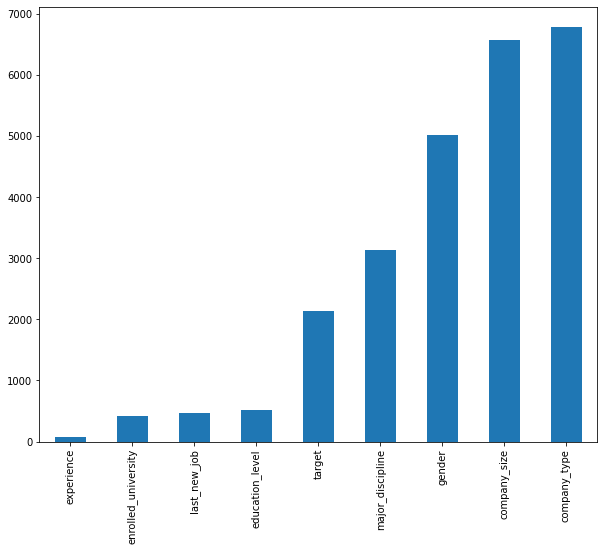

In [ ]:
null_value = data.isnull().sum()
null_value = null_value[null_value>0]
null_value.sort_values(inplace = True)
plt.figure(figsize=(10,8))
null_value.plot.bar()




In [ ]:
#IV Use missingno’s bar plot, matrix plot with 200 sample, and heatmap.


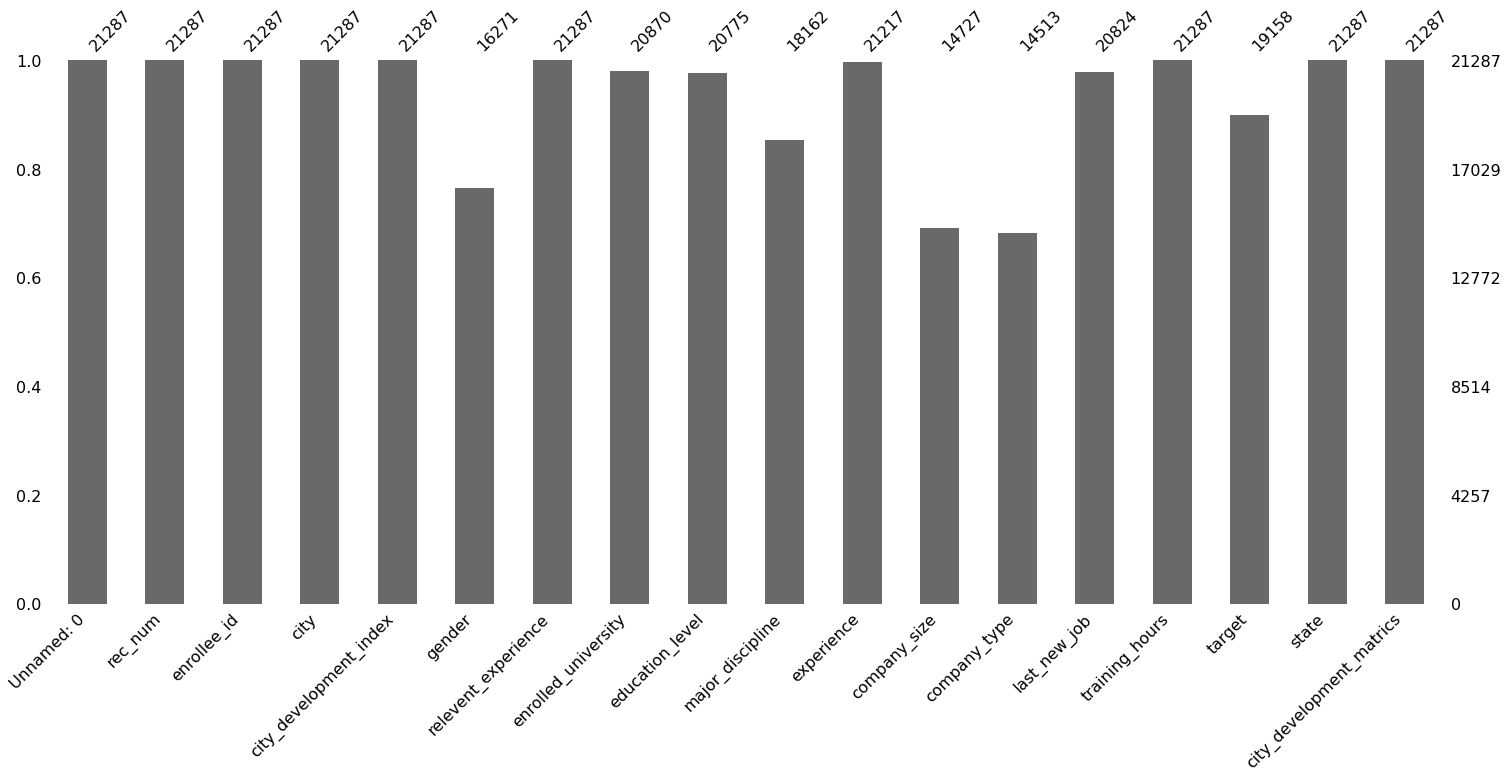

In [ ]:
msno.bar(data)

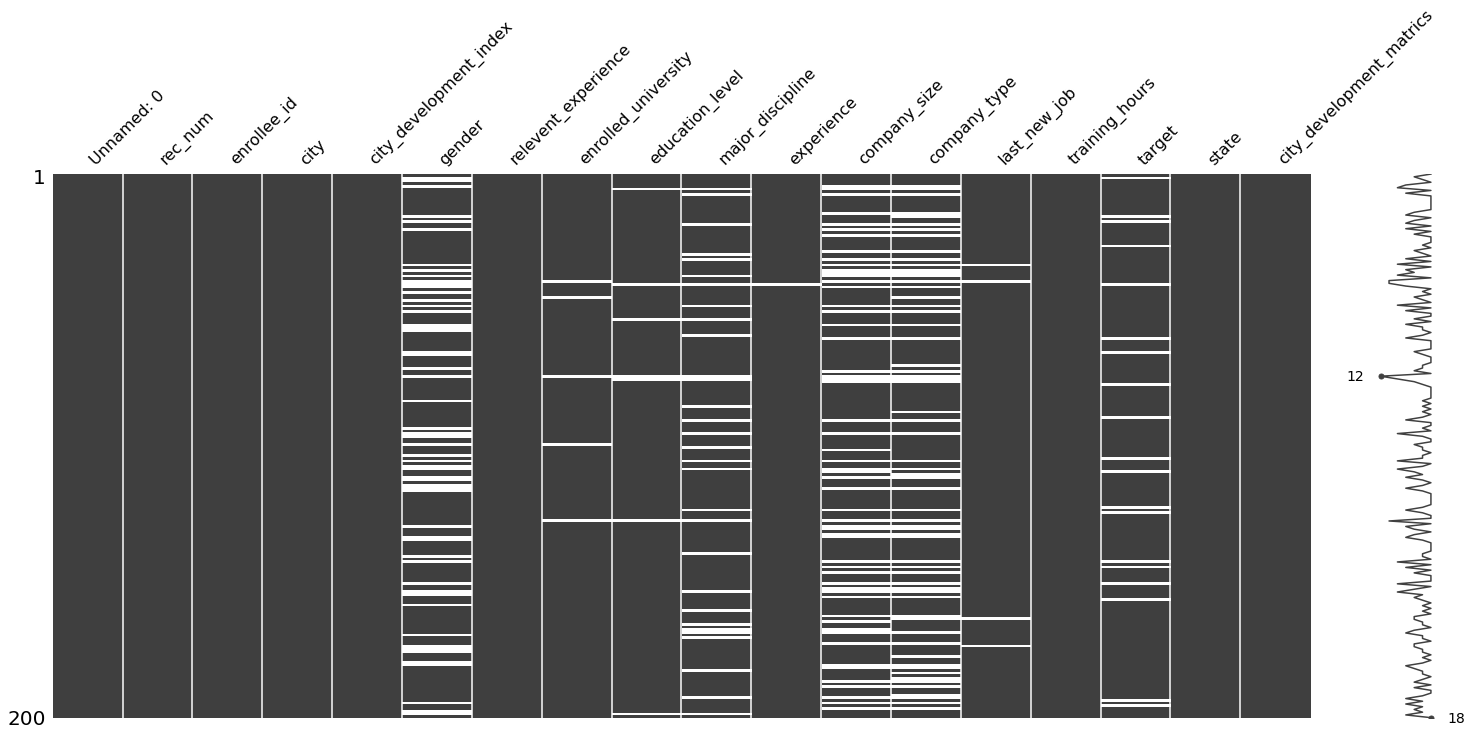

In [ ]:
msno.matrix(data.sample(200))

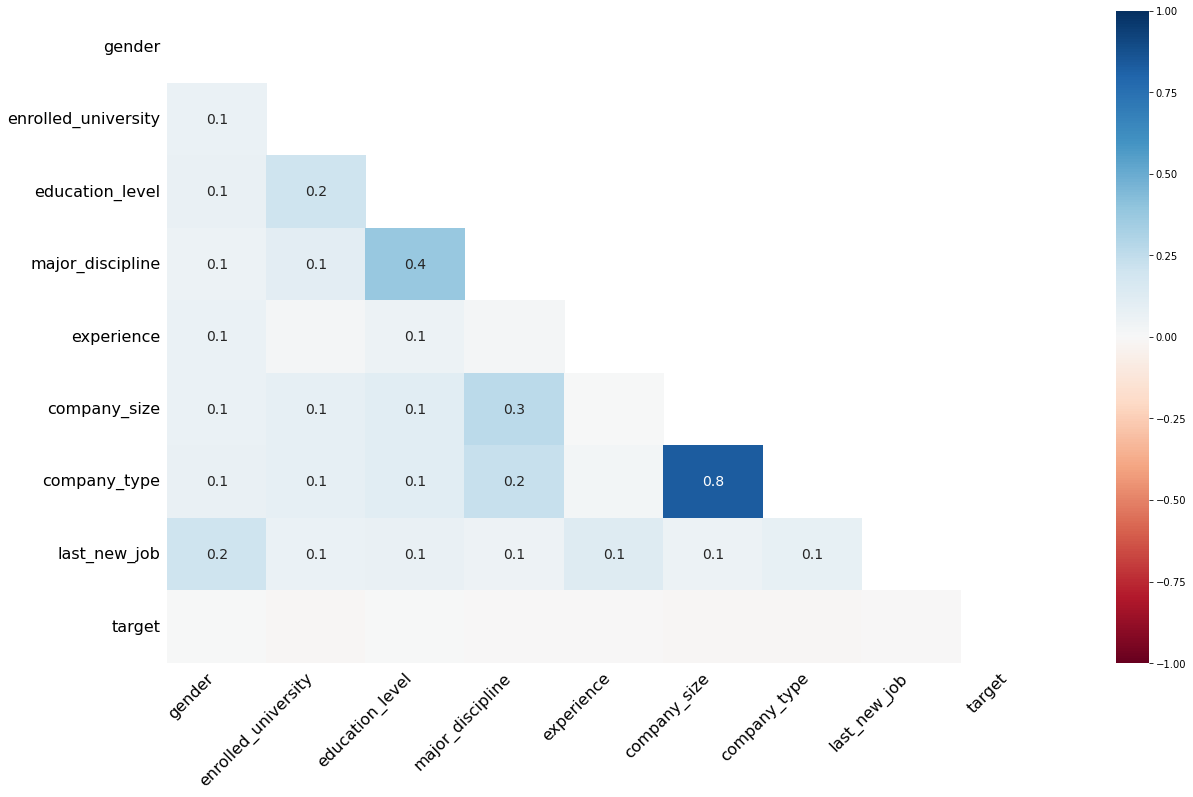

In [ ]:
msno.heatmap(data)

In [ ]:
#Interpret any interesting information you found in the heatmap and any one plot

In [ ]:
#null values in company_size and company type are highly corelated.  So if the company size is null it is likely that
#comoany_type is also null which makes sense as the two point towardd the informatiom anout the company
#company size, company type and gender have the highest number of missing values so we have to decide if to keep them or not
#if their information are valuable for our predictions
#the null values in most cases other thank the company size, company type and educational level and major dicipline are not 
#correlated to one and another

In [ ]:
#8- Understanding Categorical attributes (this part may require you to make 20+ plots ) [26 pts]

In [ ]:
#For each categorical attribute perform the following:

In [ ]:
#I. Use seaborn bar plot for the categorical feature to see different values and count

In [ ]:
print(categorial_columns.columns)

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')


In [ ]:
plt.figure(figsize = (200,100))

ax = sns.countplot(x="city", data=categorial_columns)



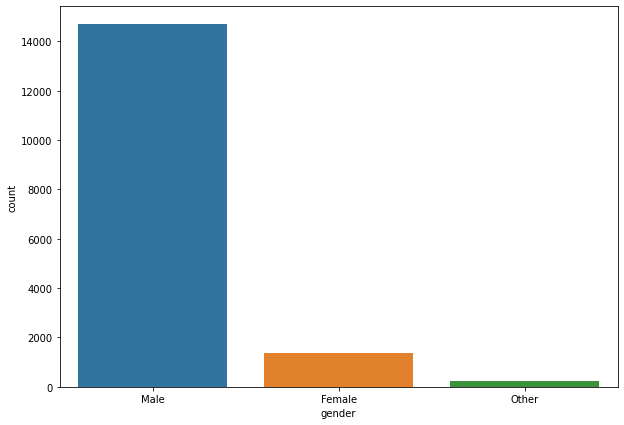

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="gender", data=categorial_columns)

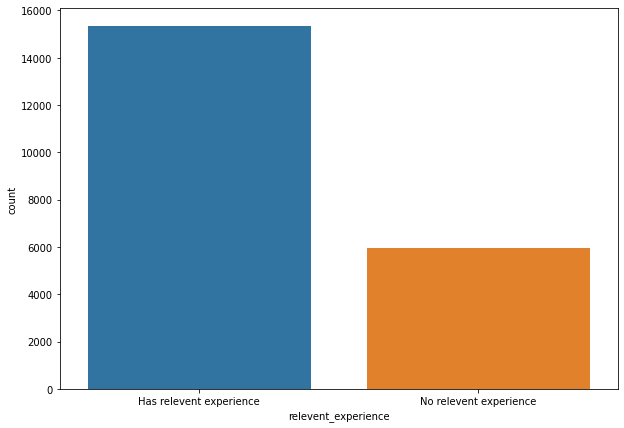

In [ ]:
plt.figure(figsize = (10,7))

ax = sns.countplot(x="relevent_experience", data=categorial_columns)

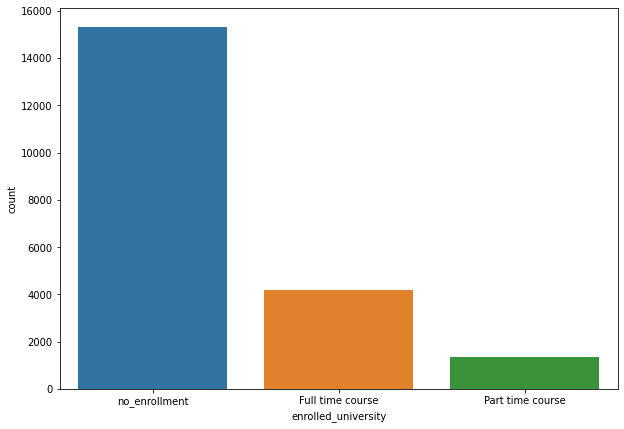

In [ ]:
plt.figure(figsize = (10,7))

ax = sns.countplot(x="enrolled_university", data=categorial_columns)




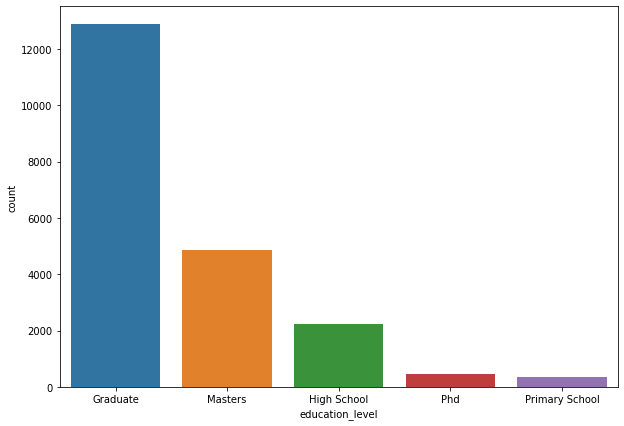

In [ ]:
plt.figure(figsize = (10,7))

ax = sns.countplot(x="education_level", data=categorial_columns)


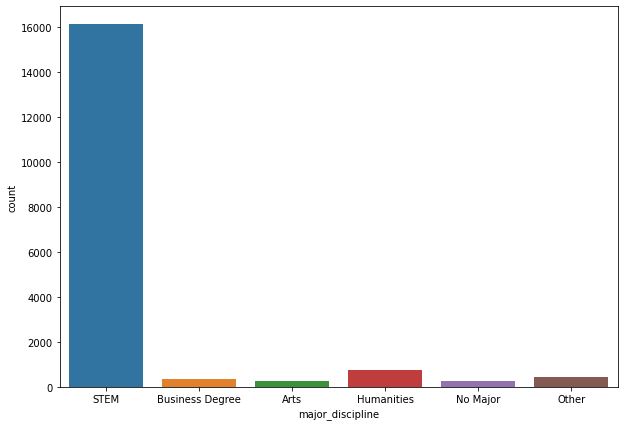

In [ ]:
plt.figure(figsize = (10,7))

ax = sns.countplot(x="major_discipline", data=categorial_columns)


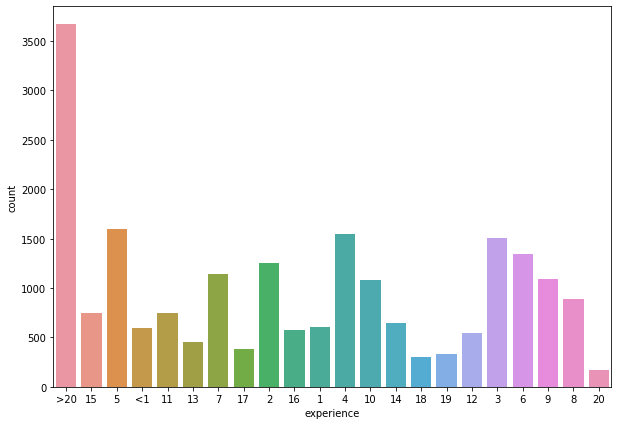

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="experience", data=categorial_columns)

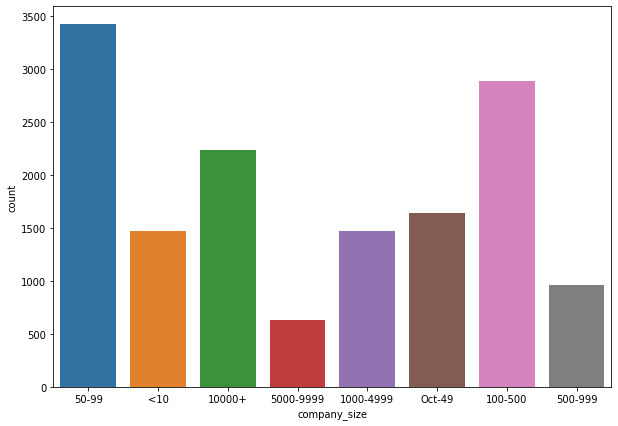

In [ ]:

plt.figure(figsize = (10,7))
ax = sns.countplot(x="company_size", data=categorial_columns)

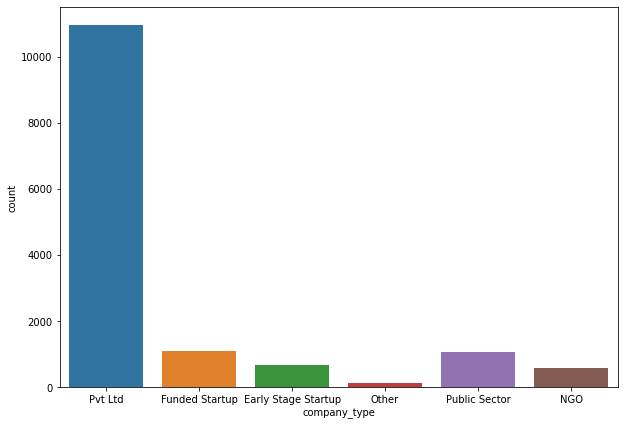

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="company_type", data=categorial_columns)

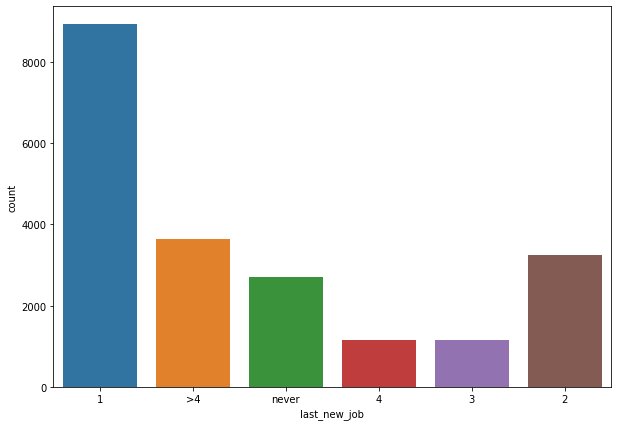

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="last_new_job", data=categorial_columns)

In [ ]:
#Use seaborn countplot for the categorical feature against the values of the target

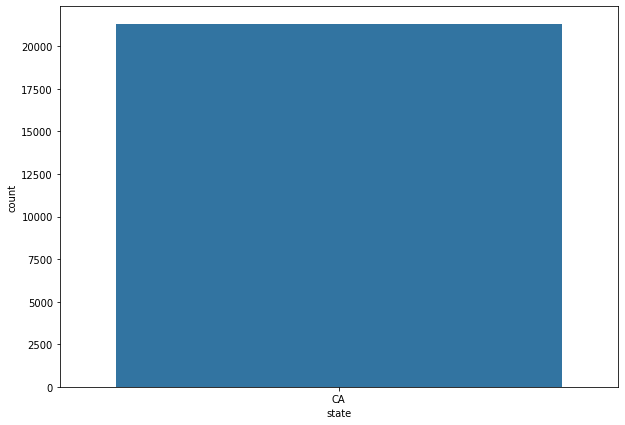

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="state", data=categorial_columns)

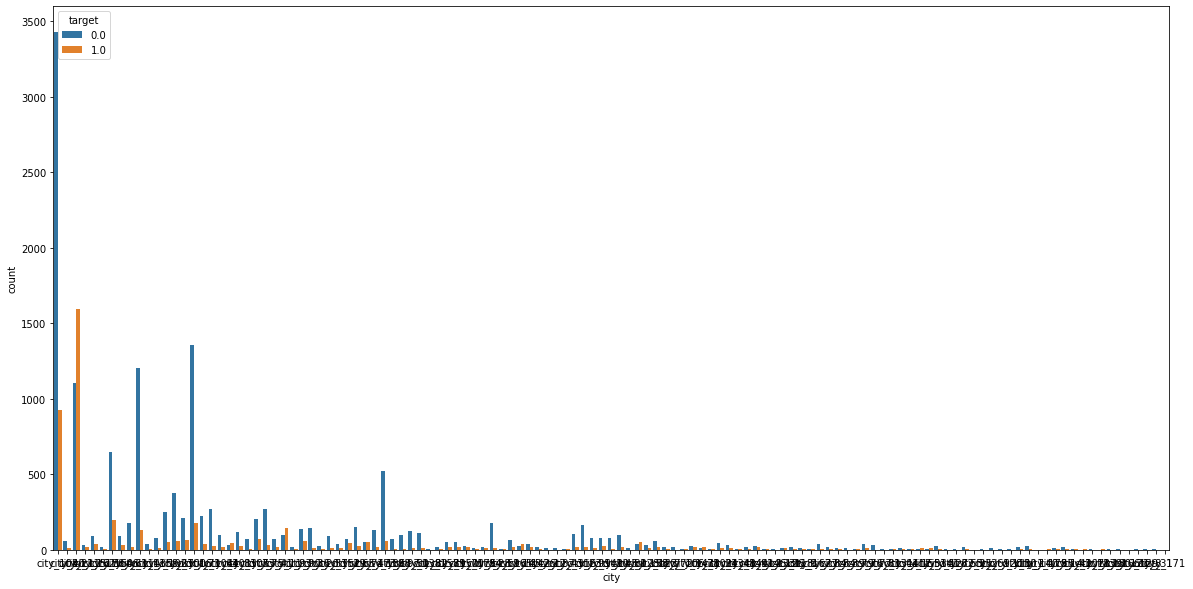

In [ ]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x="city", hue="target", data=data)


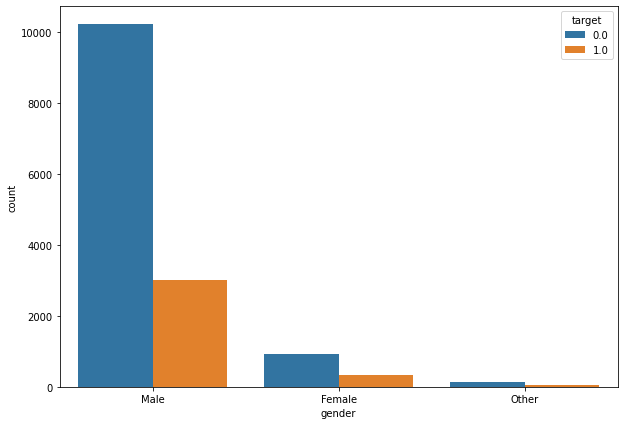

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="gender", hue="target", data=data)

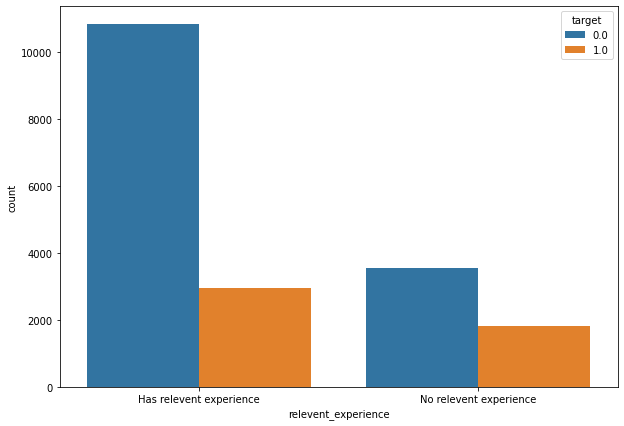

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="relevent_experience", hue="target", data=data)

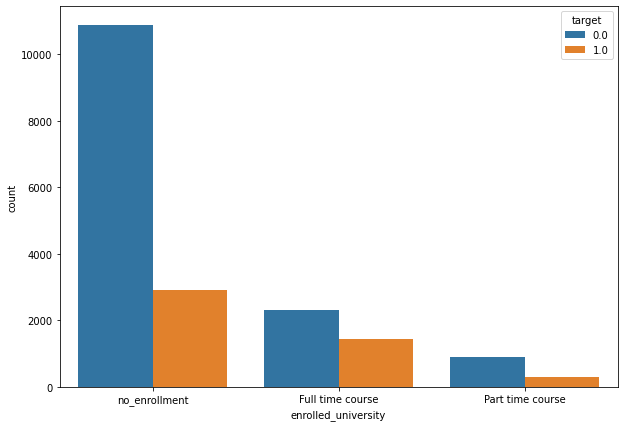

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="enrolled_university", hue="target", data=data)

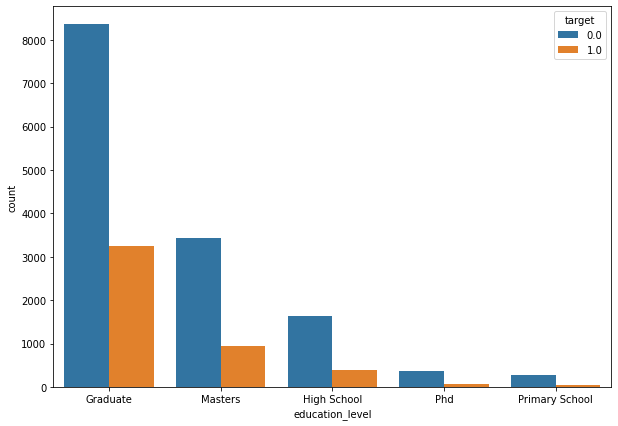

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="education_level", hue="target", data=data)

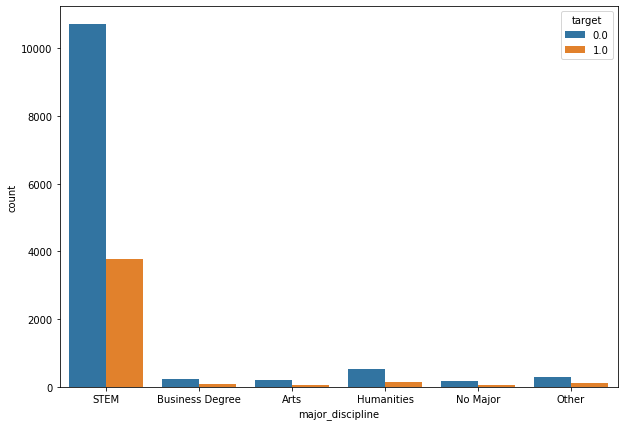

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="major_discipline", hue="target", data=data)


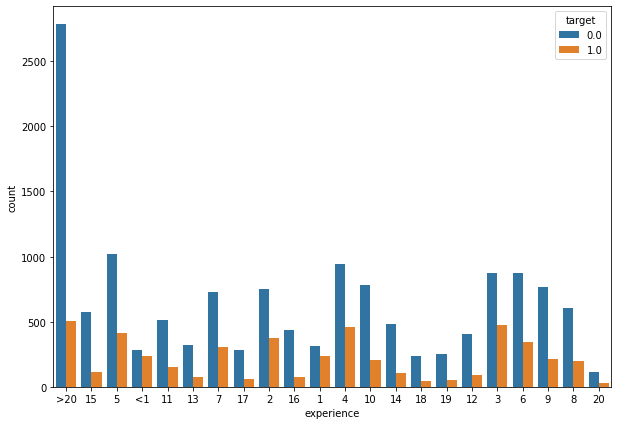

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="experience", hue="target", data=data)



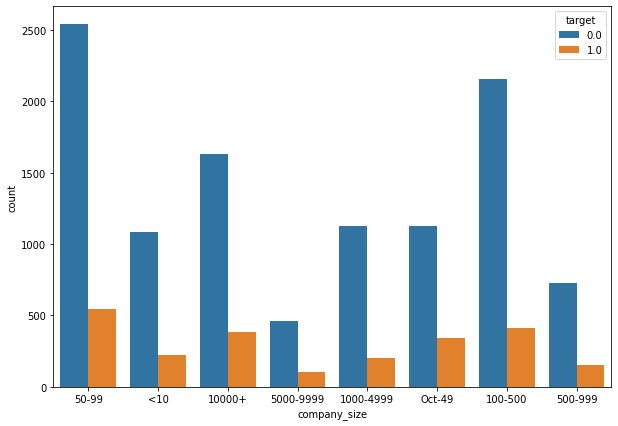

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="company_size", hue="target", data=data)


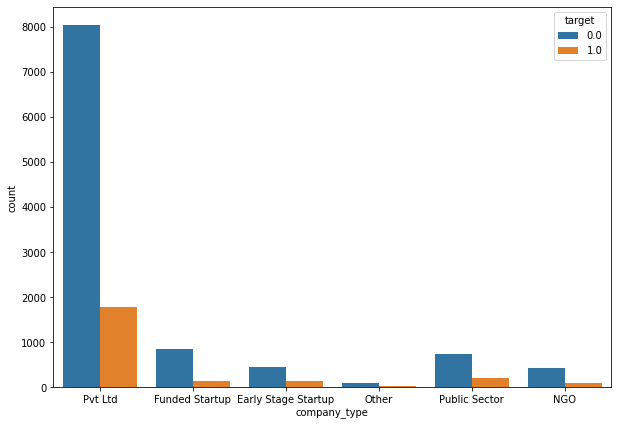

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="company_type", hue="target", data=data)

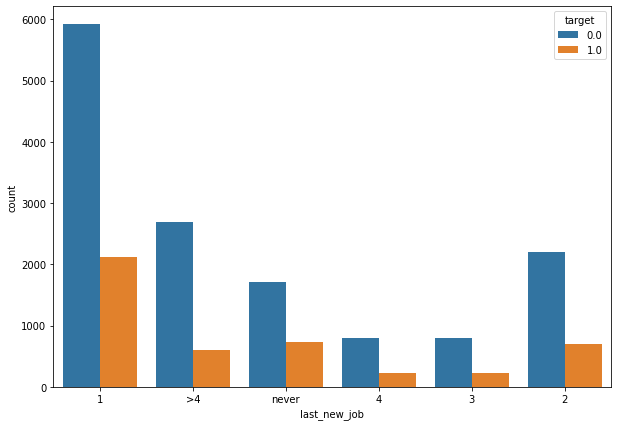

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="last_new_job", hue="target", data=data)

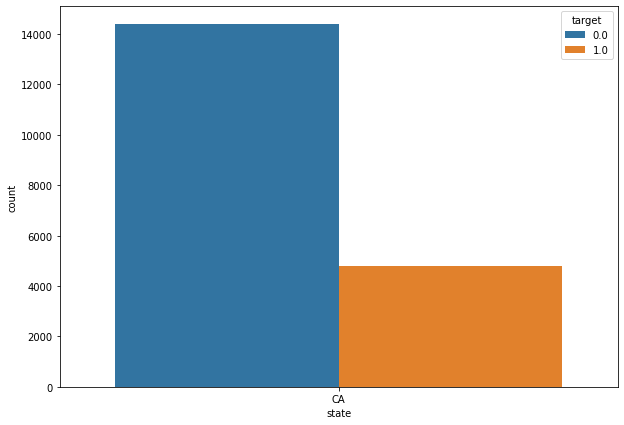

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="state", hue="target", data=data)

In [ ]:
#Interpret any interesting information and any information that might help you to make any decision on combining, 
#removing, or adding features based on that, or any resampling maybe needed.

In [ ]:
# Since there is only one state (California) listed on the data set we can remove this data.  Because it will cause bias
# if we built our model based on this singular information when we feed it other data from other states, it might nor perform
#well.

#STEM program has the highest concentration in data in erms of major

#If the last new job is less than 1 year the individual is much less likely to want to change jobs strong relation 
#with target = 0

#the pvt company type is highly unlikely to be intersted in job change.  Strong relation with target =0

# people with more than 20 years of experince are highly unlikey to want to switch

# The people that enrolled in the course have a close to 50 percent chance of wanting to chnage jobs

#people with relevant experince have higher chance of target =0

In [ ]:
#9- Understanding Numerical attributes (16 pts)
#For each numerical features, perform the following:


In [ ]:
#I Plot their distributions using histogram  (removed the group by word)


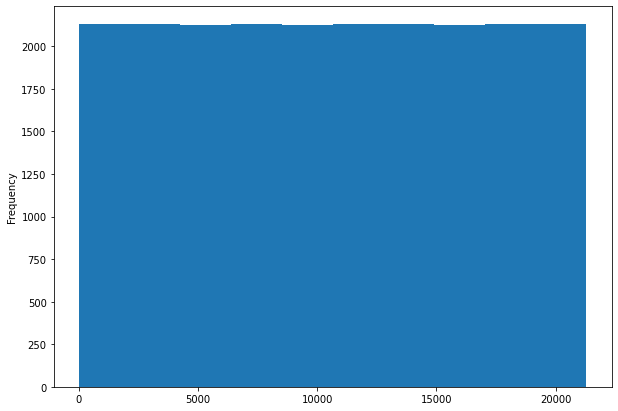

In [ ]:
plt.figure(figsize = (10,7))

data['rec_num'].astype(int).plot.hist()


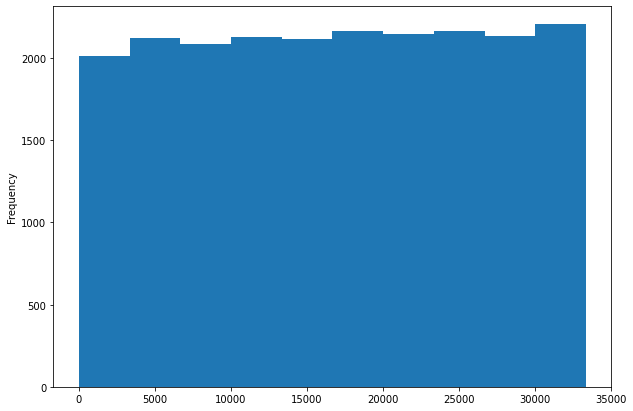

In [ ]:
plt.figure(figsize = (10,7))

data['enrollee_id'].astype(int).plot.hist()


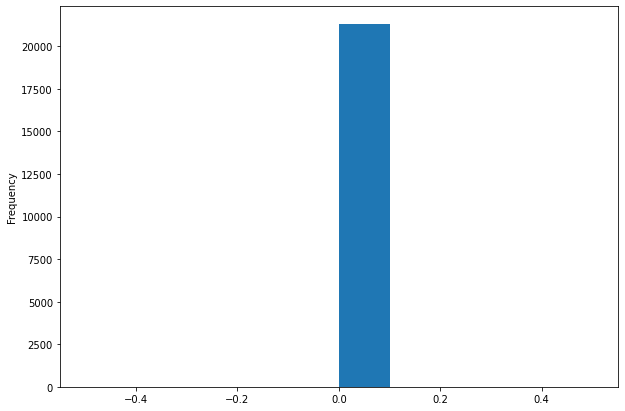

In [ ]:
plt.figure(figsize = (10,7))
data['city_development_index'].astype(int).plot.hist()


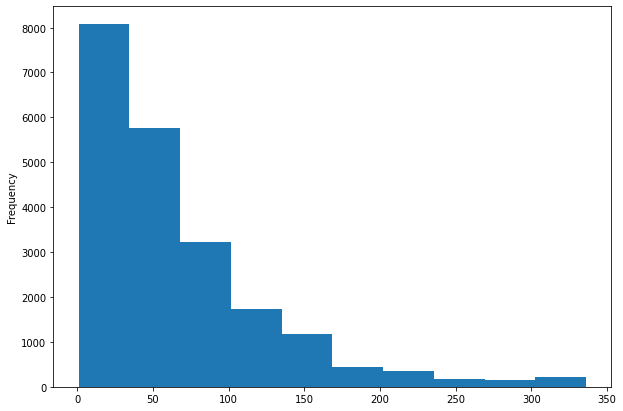

In [ ]:
plt.figure(figsize = (10,7))
data['training_hours'].astype(int).plot.hist()


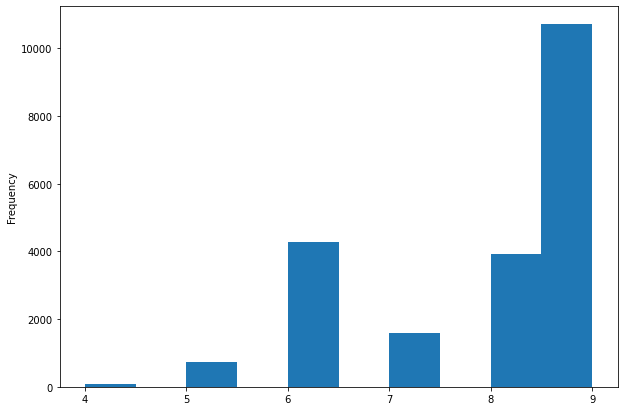

In [ ]:
plt.figure(figsize = (10,7))
data['city_development_matrics'].astype(int).plot.hist()

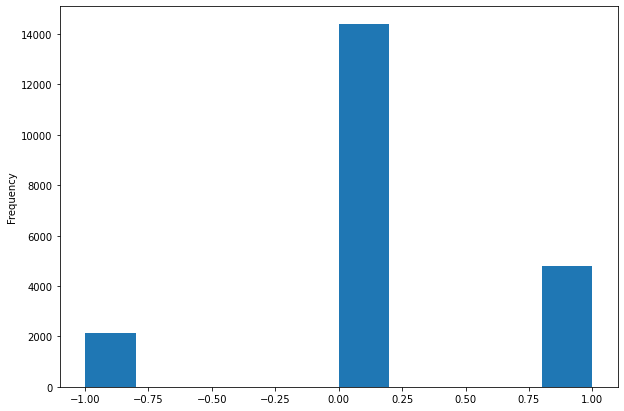

In [ ]:
#for missing data I filled the values with -1 so I can display the hist since it would mot accept N/A as a value
plt.figure(figsize = (10,7))
data['target'].fillna(-1).astype(int).plot.hist()

In [ ]:
#Plot the distribution using seaborn distplot

<Figure size 720x504 with 0 Axes>

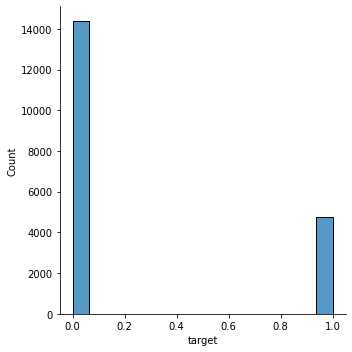

In [ ]:
plt.figure(figsize = (10,7))
sns.displot(data['target'])

<Figure size 720x504 with 0 Axes>

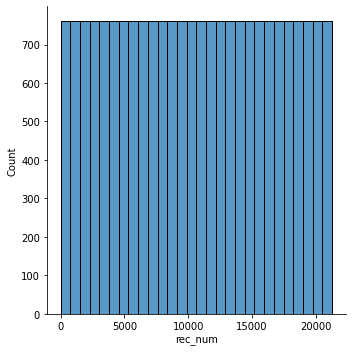

In [ ]:
plt.figure(figsize = (10,7))
sns.displot(data['rec_num'])

<Figure size 720x504 with 0 Axes>

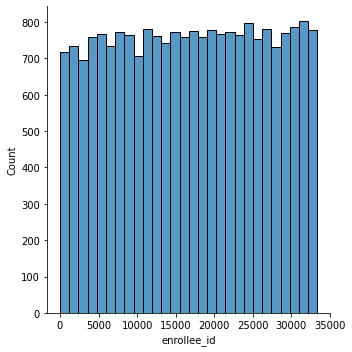

In [ ]:
plt.figure(figsize = (10,7))
sns.displot(data['enrollee_id'])


<Figure size 1440x1440 with 0 Axes>

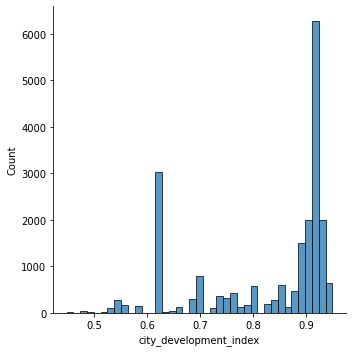

In [ ]:
plt.figure(figsize = (20,20))
sns.displot(data['city_development_index'])


count    21287.000000
mean        65.328510
std         60.075201
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

<Figure size 1440x1440 with 0 Axes>

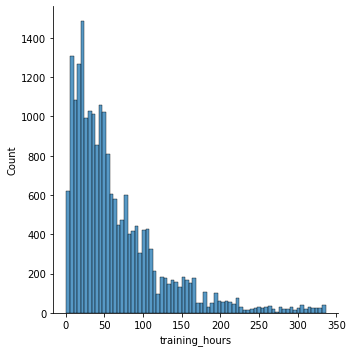

In [ ]:
plt.figure(figsize = (20,20))

sns.displot(data['training_hours'])
data['training_hours'].describe()

count    21287.000000
mean         8.284615
std          1.235365
min          4.480000
25%          7.390000
50%          9.030000
75%          9.200000
max          9.490000
Name: city_development_matrics, dtype: float64

<Figure size 1440x1440 with 0 Axes>

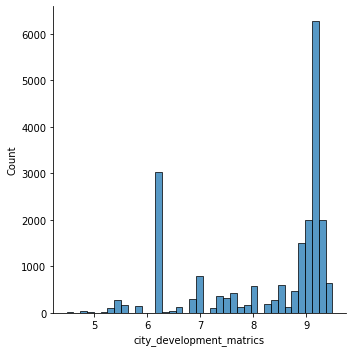

In [ ]:
plt.figure(figsize = (20,20))
sns.displot(data['city_development_matrics'])
data['city_development_matrics'].describe()


<Figure size 1440x1440 with 0 Axes>

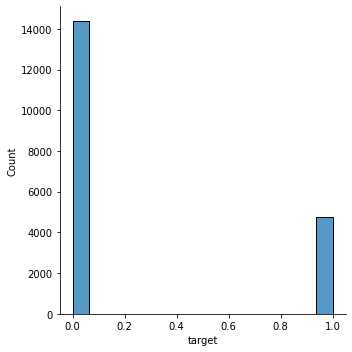

In [ ]:
plt.figure(figsize = (20,20))
sns.displot(data['target'])

In [ ]:
#Interpret any interesting information

In [ ]:
# the record num, employee ID, city devlopment index yeild uniform result so they do not make a difference in our outcome
#The training hours are heavily right skewed , people with less training are much more prevelant. The mean is much higher than
#the 50% percentile.
#the city development matrix is highly concentrated around the 9 range, the 75% percentile is right around 9 so is the max so
#this data is heavily left skewed

In [ ]:
#Correlation: (15 pts)

In [ ]:
#I- For the numerical attributes, use heatmap to show the correlation


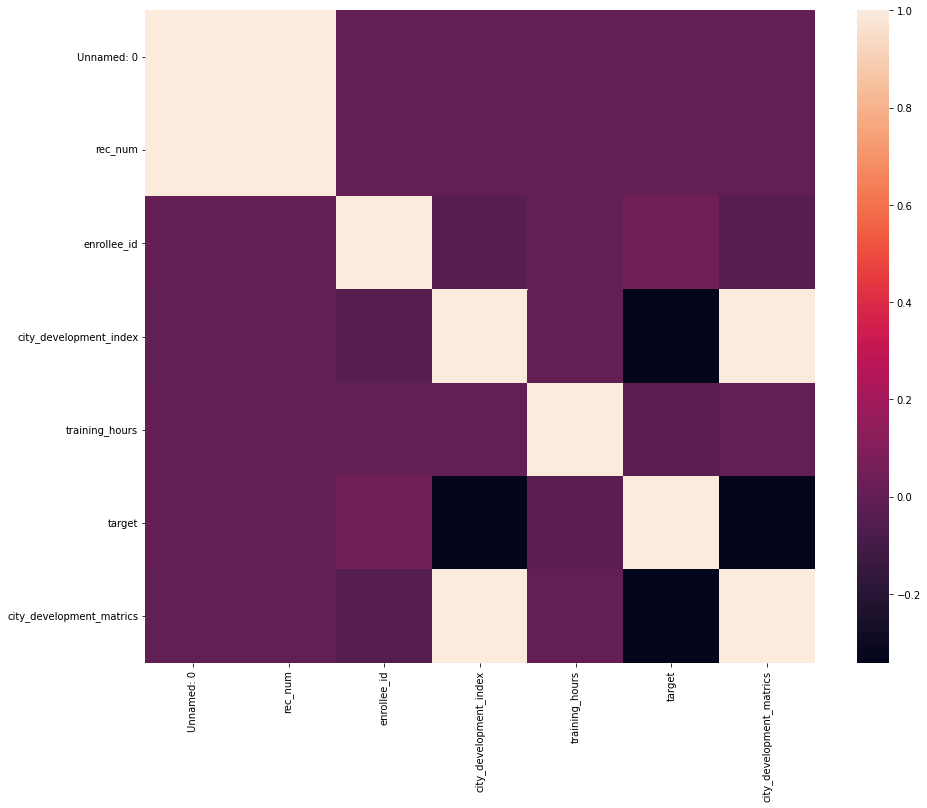

In [ ]:
correlation = numerical_columns.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(correlation)



In [ ]:
print(correlation['target'].sort_values(ascending = False))


target                      1.000000
enrollee_id                 0.049475
Unnamed: 0                 -0.000077
rec_num                    -0.000077
training_hours             -0.021577
city_development_matrics   -0.341665
city_development_index     -0.341665
Name: target, dtype: float64


In [ ]:
#If you find any interesting short list of columns, create another heatmap with them and show the
#correlations inside the heaptmap as well

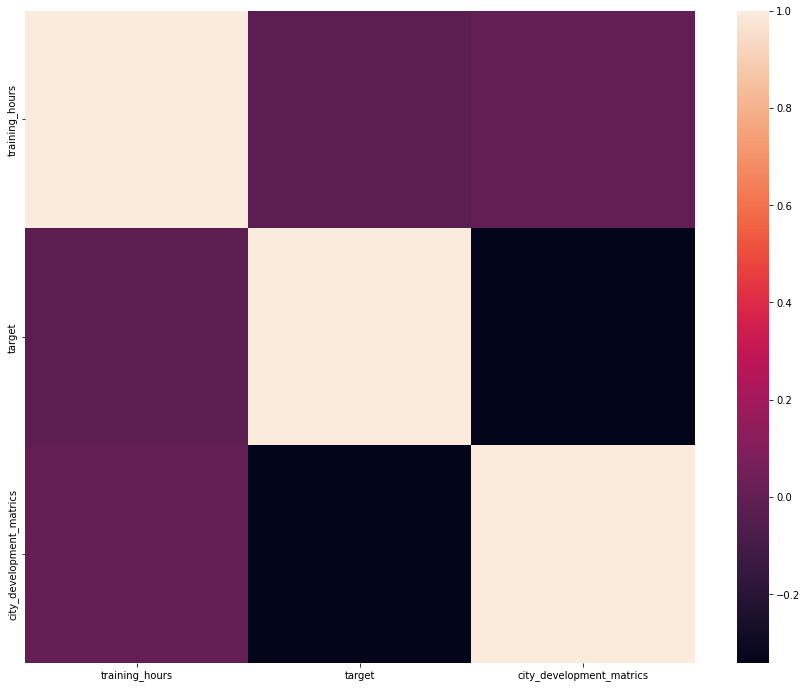

In [ ]:
modified_data=numerical_columns.drop(columns=['Unnamed: 0', 'rec_num', 'enrollee_id','city_development_index'])
correlation=modified_data.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(correlation)



In [ ]:
#Show scatter plots between columns to show the relationships with the target


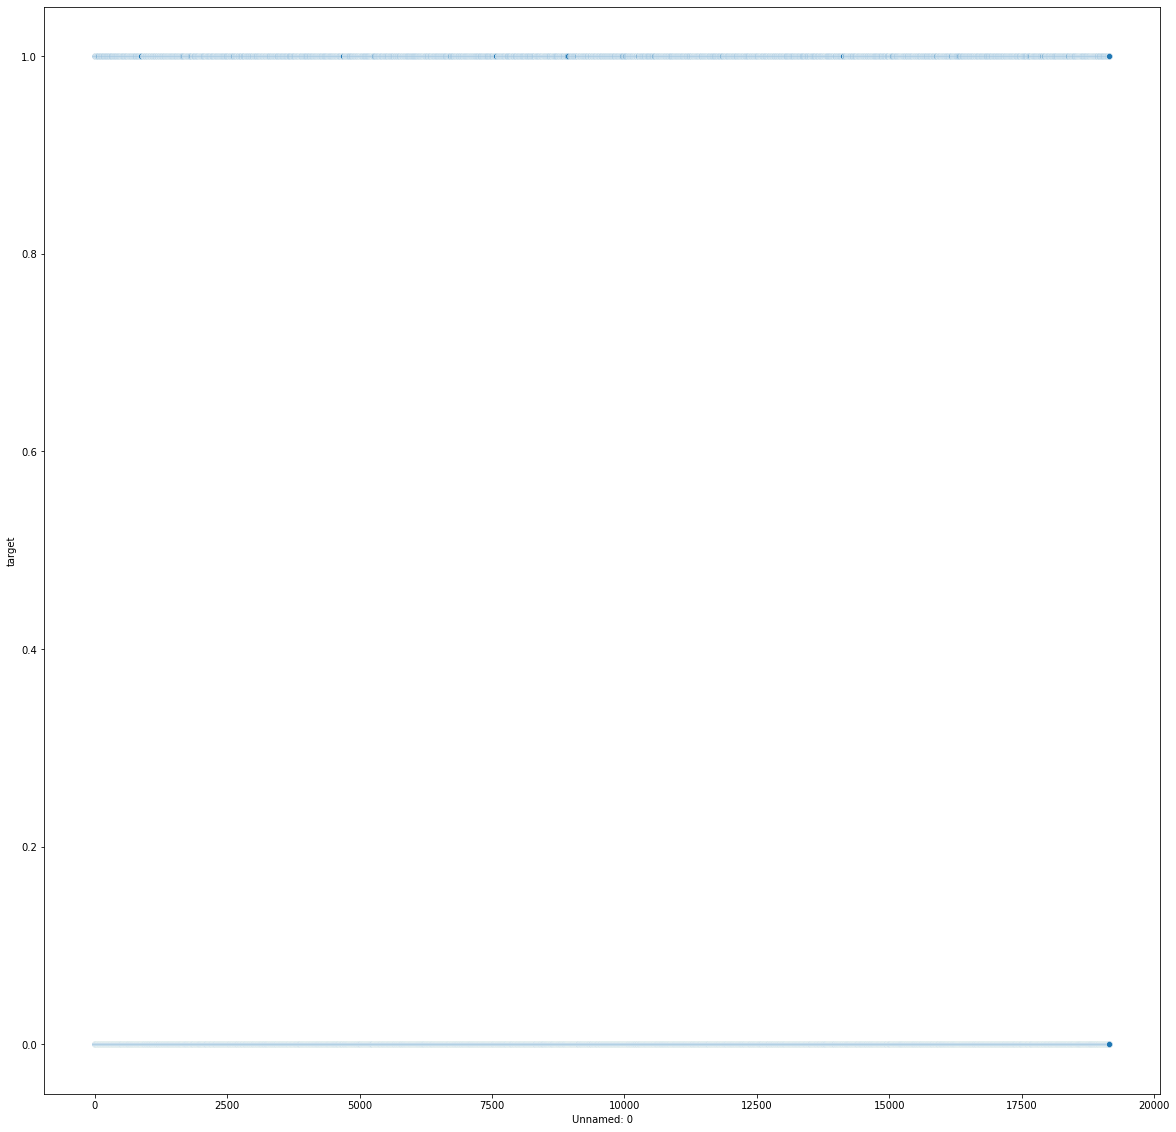

In [ ]:
plt.figure(figsize = (20,20))
sns.scatterplot(x='Unnamed: 0', y = 'target', data=numerical_columns)



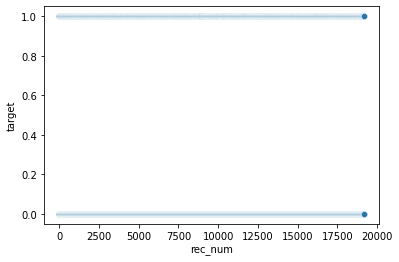

In [ ]:
sns.scatterplot(x='rec_num', y = 'target', data=numerical_columns)



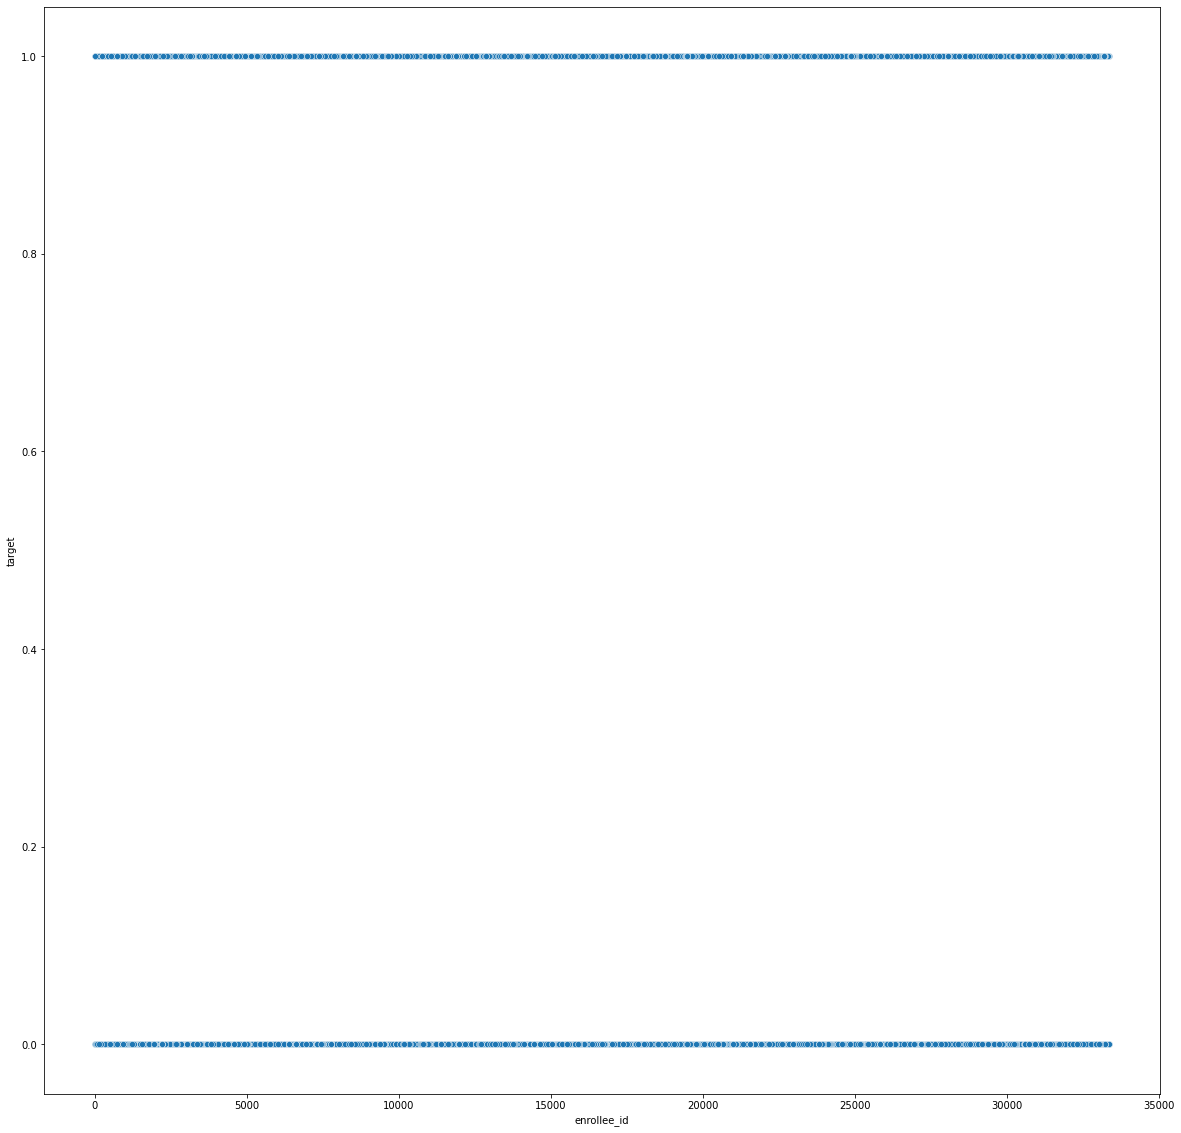

In [ ]:
plt.figure(figsize = (20,20))
sns.scatterplot(x='enrollee_id', y = 'target', data=numerical_columns)

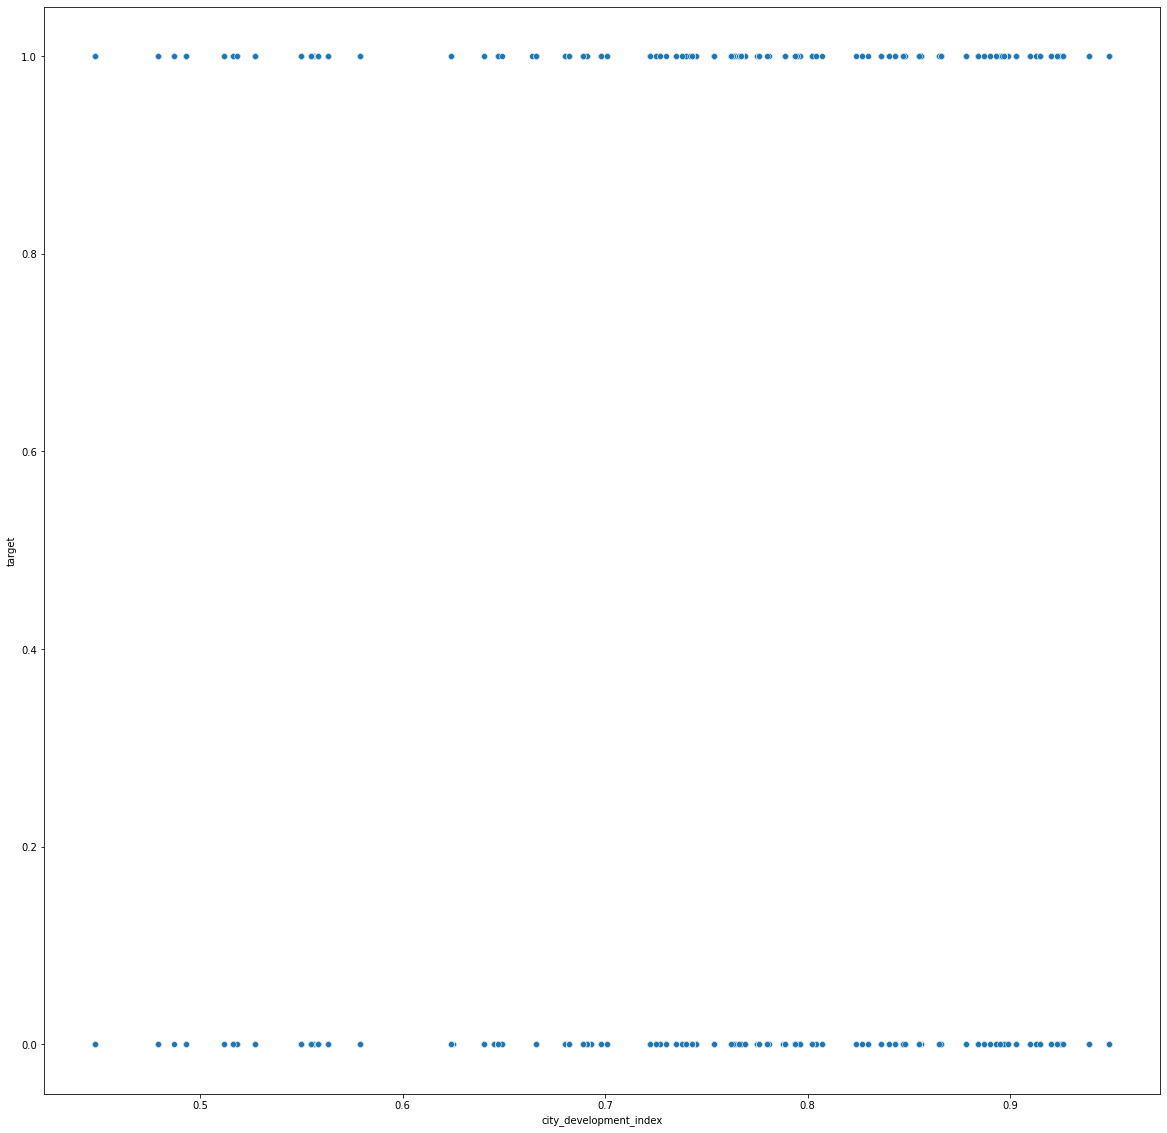

In [ ]:
plt.figure(figsize = (20,20))

sns.scatterplot(x='city_development_index', y = 'target', data=numerical_columns)


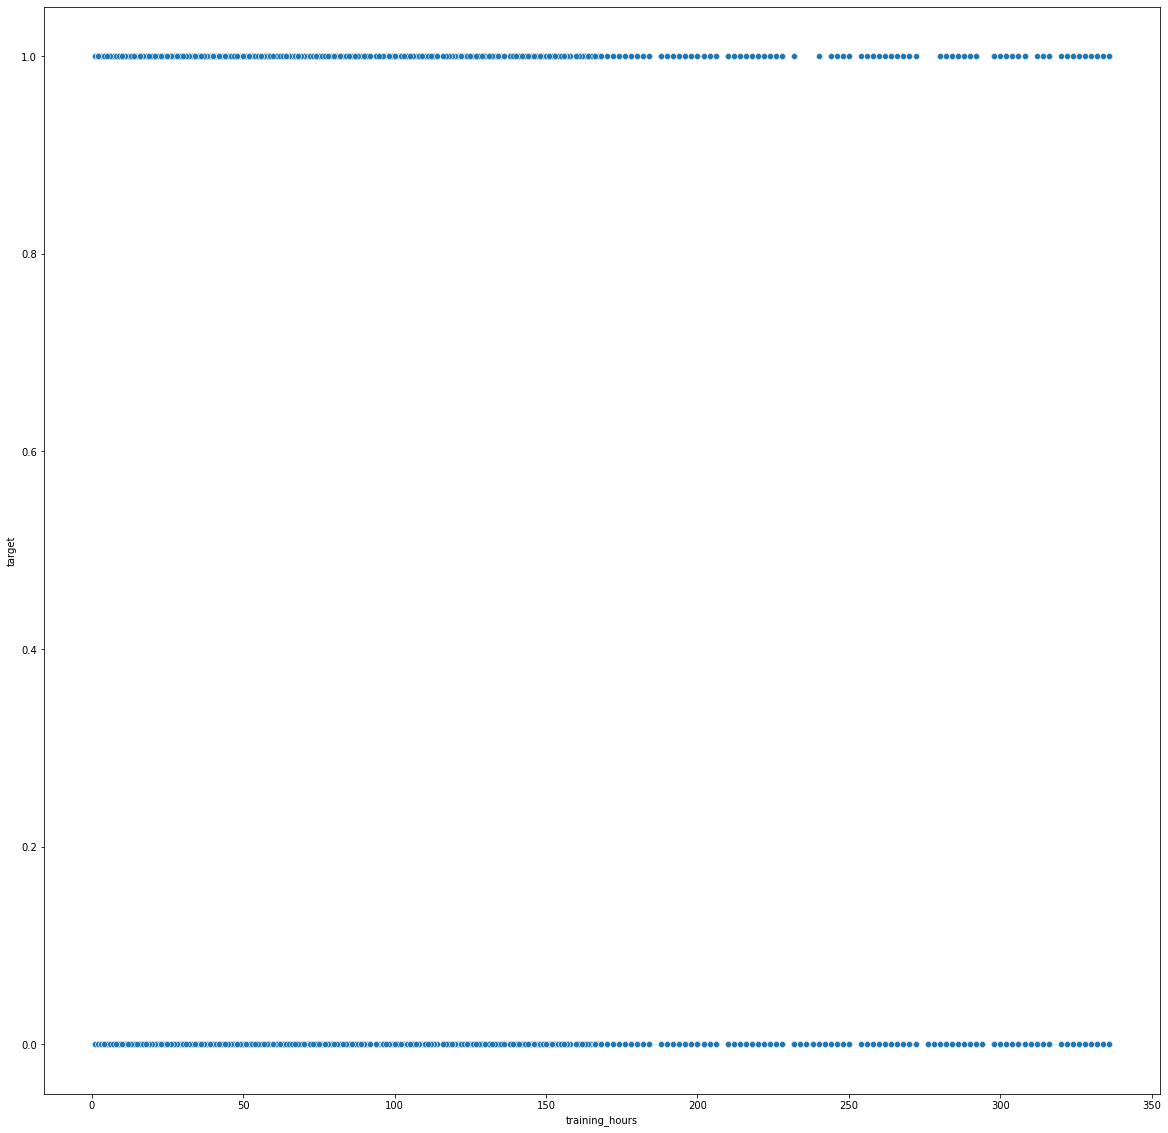

In [ ]:

plt.figure(figsize = (20,20))
sns.scatterplot(x='training_hours', y = 'target', data=numerical_columns)






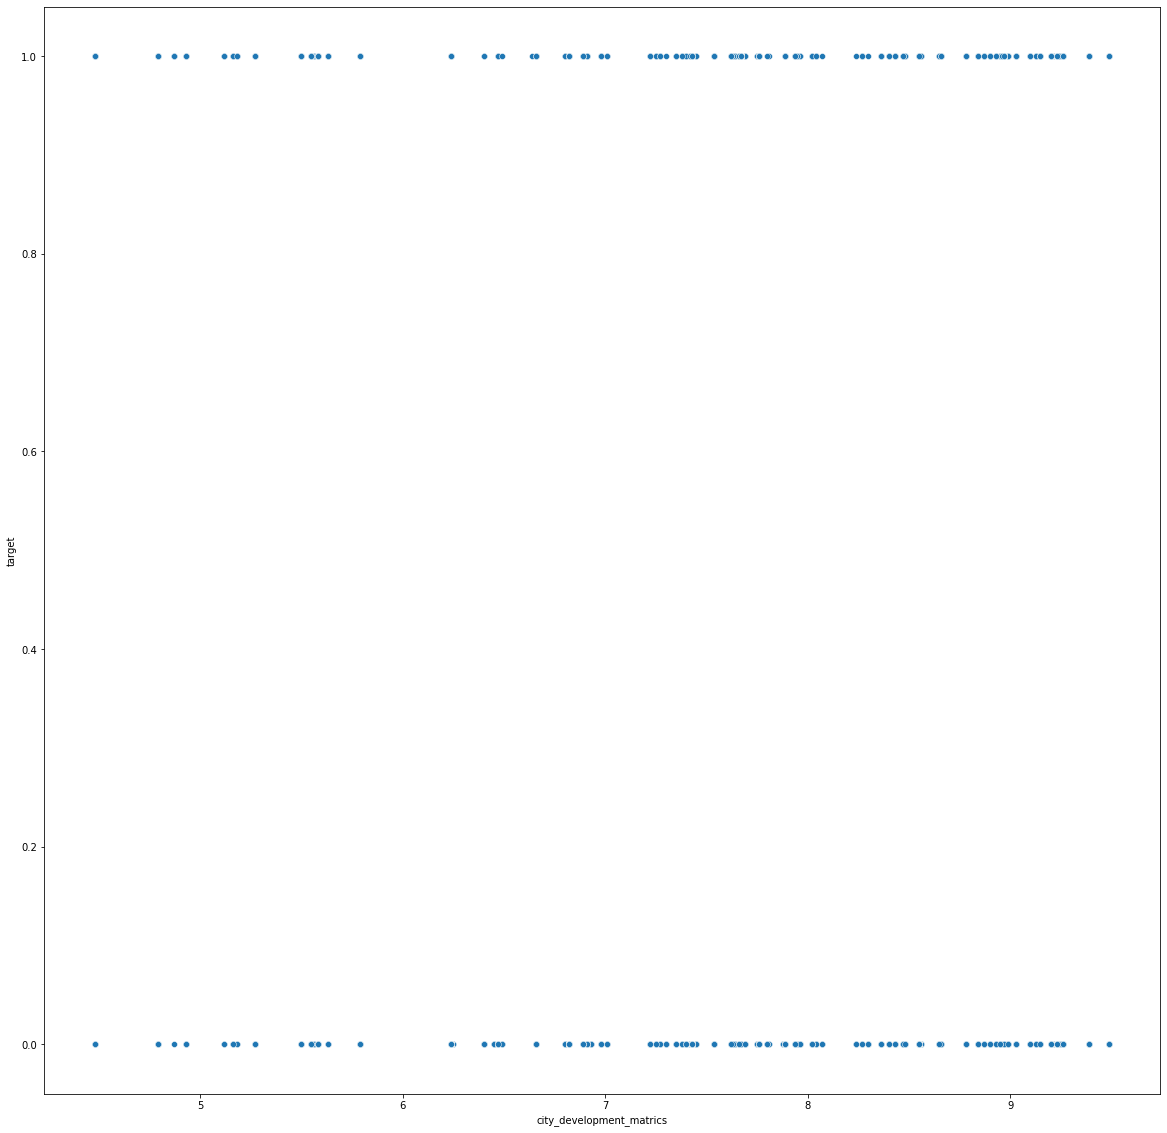

In [ ]:

plt.figure(figsize = (20,20))
sns.scatterplot(x='city_development_matrics', y = 'target', data=numerical_columns)


In [ ]:
#Interpret and explain any finding and next course of action from there



In [ ]:
#seeing how uniform target is compared to 'Unnamed: 0', 'rec_num', 'enrollee_id, shows that target is not related to these.  
#the target changes with training_hours and city_development_index and city_development_matrics so we should keep these 
#data for consideration

In [ ]:
#11- Outliers: (5)

In [ ]:
#Use boxplot or any other strategies to find outliers

In [ ]:
# I am using Z score
# where z is more than 3 falls beyond the 99% percentile
#these are the positions where z>3

In [ ]:
z = np.abs(st.zscore(data["city_development_index"]))
z



array([0.74100055, 0.4246738 , 1.65510784, ..., 0.47386684, 0.1980149 ,
       0.1980149 ])

In [ ]:


threshold = 3
print(np.where(z > threshold))


(array([ 1523,  4744,  5010,  5265,  5567,  6127,  7724,  7864,  9134,
       10401, 13549, 14913, 15114, 16555, 16784, 17701, 18065, 19807,
       19831]),)


In [ ]:
z = np.abs(st.zscore(data["training_hours"]))
z



array([0.48820809, 0.30509995, 0.29416306, ..., 0.7878396 , 0.31080925,
       0.90436296])

In [ ]:
threshold = 3
print(np.where(z > threshold))

(array([   89,   119,   133,   161,   176,   256,   299,   331,   382,
         410,   422,   507,   528,   620,   705,   711,   746,   757,
         862,   933,   990,  1043,  1108,  1194,  1213,  1219,  1249,
        1271,  1301,  1331,  1380,  1420,  1452,  1547,  1592,  1690,
        1776,  1812,  1826,  1832,  2052,  2056,  2112,  2167,  2242,
        2260,  2265,  2319,  2335,  2412,  2421,  2463,  2479,  2489,
        2523,  2608,  2619,  2658,  2671,  2692,  2709,  2710,  2776,
        2788,  2835,  2862,  2905,  2928,  2934,  3036,  3076,  3099,
        3166,  3176,  3182,  3217,  3256,  3266,  3270,  3285,  3343,
        3496,  3518,  3582,  3587,  3598,  3624,  3632,  3702,  3720,
        3727,  3766,  3802,  3845,  3871,  3918,  3942,  3970,  4005,
        4014,  4036,  4075,  4117,  4234,  4240,  4372,  4397,  4399,
        4530,  4604,  4630,  4779,  4789,  4794,  4813,  4852,  4882,
        4918,  4964,  5015,  5050,  5120,  5156,  5191,  5257,  5296,
        5300,  5342

In [ ]:
z = np.abs(st.zscore(data["city_development_matrics"]))
z


array([0.74100055, 0.4246738 , 1.65510784, ..., 0.47386684, 0.1980149 ,
       0.1980149 ])

In [ ]:
threshold = 3
print(np.where(z > threshold))

(array([ 1523,  4744,  5010,  5265,  5567,  6127,  7724,  7864,  9134,
       10401, 13549, 14913, 15114, 16555, 16784, 17701, 18065, 19807,
       19831]),)


In [ ]:
z = np.abs(st.zscore(data["enrollee_id"]))
z


array([0.82449663, 1.33698947, 0.5527503 , ..., 1.54891415, 0.93644113,
       0.48470968])

In [ ]:
threshold = 3
print(np.where(z > threshold))

(array([], dtype=int64),)


In [ ]:
z = np.abs(st.zscore(data["target"]))
z


array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
threshold = 3
print(np.where(z > threshold))

(array([], dtype=int64),)


In [ ]:
#12 What are the different values of experience, can you categorize them in to 0, 1, and 2? (5 pts)  


In [ ]:
x=data["experience"].value_counts()
data["experience"].value_counts()


>20    3669
5      1593
4      1548
3      1508
6      1346
2      1255
7      1144
9      1093
10     1081
8       884
11      750
15      745
14      641
1       605
<1      596
16      576
12      546
13      453
17      378
19      333
18      306
20      167
Name: experience, dtype: int64

In [ ]:
for i in range(len(data['experience'])):
    if data ['experience'][i] == "<1":
        data['experience'][i] = 0
    elif data ['experience'][i] == ">20":
        data['experience'][i] = 2
    else:
        data['experience'][i] = 1
        
data ['experience'].value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    17022
2     3669
0      596
Name: experience, dtype: int64

In [ ]:
#Summary and discussion: (15 pts)
#Finally after all the above EDA, summarize your finding, next course of action such as we may need to transform
#distribution because of right skew etc, need to remove a particular columns for any reasons, remove records 
#for any reasons, need to rebalance data and what are the rebalancing options (if needed), and any other finding.

In [ ]:
#since there is only one state in data set,it can skew the model, state CA can be removed
#null values in company_size and company type are highly corelated.  So if the company size is null it is likely that
#company_type is also null which makes sense as the two point towardd the informatiom anout the company.
#city_development_index & city_development_matrics are basically same data by a multiplyer of 10  So one column can be eliminated
#rec_num & Unnamed seem to be the same data, so one can be eliminated
# the target which is an indicator of individual looking to change jobs or not has a mean of 0.249.  Given that this number is
#either 0 or 1 I think it shows most of the targets are concentrated at 0 (not looking for a job)
#seeing how uniform target is compared to 'Unnamed: 0', 'rec_num', 'enrollee_id, shows that target is not related to these.  
#the target changes with training_hours and city_development_index and city_development_matrics so we should keep these 
#data for consideration
#training hours had many many outliers, they can be removed to keep the information balanced
#looking at NULL values:
#company_type               6774
#company_size               6560
#gender                     5016
#these data have over 25 to 30% missing value we have 
# the poorly correlated items can be seen in in [84]:
#target                      1.000000
#enrollee_id                 0.049475
#Unnamed: 0                 -0.000077
#rec_num                    -0.000077
#training_hours             -0.021577
#city_development_matrics   -0.341665
#city_development_index     -0.341665
#Name: target, dtype: float6
#the city_matric and city_development are identical one can be eliminated. 
#they are also negatively related . Could use something liek the below code to make the data more related
#correlation = num_features.corr()
#corr = correlation['target'].to_frame()
#corr[corr['target'] <0.30 ].index
#r = corr[(-0.3 < corr['target']) & (corr['targer'] < 0.3)].index
